Exercise 2.3

<Figure size 1000x600 with 0 Axes>

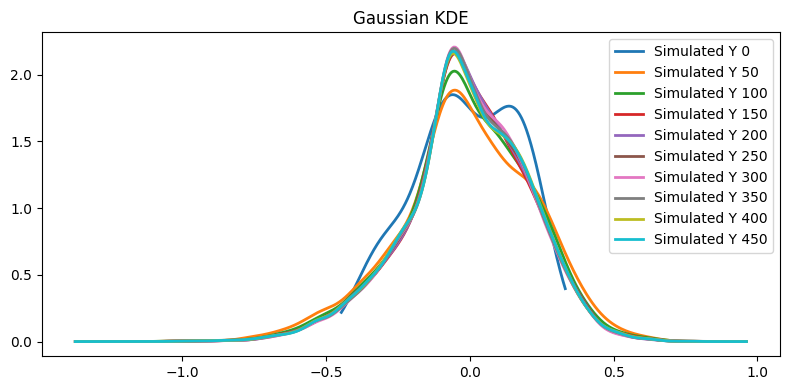

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import invgamma
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

X=np.random.randn(50, 2) # [50, 2]
Y=X @ [1,2]+1.5*np.random.randn(50) #[50, 1]

# init sigma2 dist
alpha_init=5
beta_init=5
dist=invgamma(a=alpha_init, scale=beta_init)
sigma2_init=dist.rvs(size=1)

# init beta dist
beta_mean_init=0.0*np.ones(2)
beta_sigma2_init=0.01*np.eye(2)

itercnt=500
simulation_results=[]
simulation_results.append([np.nan, sigma2_init])
simulation_y=[]
plt.figure(figsize=(10,6))
burn_in=0

def plot_hist_with_kde(samples, bins=40, bw_method="scott", label="KDE"):
    samples = np.asarray(samples).ravel()           # 1D로 평탄화
    kde = gaussian_kde(samples, bw_method=bw_method)

    # 평가 구간(grid)
    x_min, x_max = samples.min(), samples.max()
    pad = 0.1 * (x_max - x_min if x_max > x_min else 1.0)
    xs = np.linspace(x_min - pad, x_max + pad, 400)

    # 히스토그램 (밀도 정규화) + KDE 곡선
    #plt.hist(samples, bins=bins, density=True, alpha=0.4, edgecolor="black", label="Histogram (density)")
    plt.plot(xs, kde(xs), lw=2, label=label)

plt.figure(figsize=(8,4))
for i in range(itercnt):
    prev_beta, prev_sigma2 = simulation_results[-1]

    # sampling beta
    beta_dis_sigma2 = np.linalg.inv(X.T @ X / prev_sigma2 + np.linalg.inv(beta_sigma2_init))
    beta_dis_mean=beta_dis_sigma2 @ (X.T @ Y / prev_sigma2+np.linalg.inv(beta_sigma2_init) @ beta_mean_init)
    new_beta=np.random.multivariate_normal(beta_dis_mean, beta_dis_sigma2) # [2, 1]

    # sampling sigma2
    alpha_new=alpha_init + len(Y) / 2
    beta_new=beta_init + 0.5 * (Y-X @ new_beta).T @ (Y-X @ new_beta)
    new_sigma2=invgamma(a=alpha_new, scale=beta_new).rvs(size=1)

    simulation_results.append([new_beta, new_sigma2])
    simulation_y.append(X @ new_beta)
    if i % 50 == 0 and i>=burn_in:
        # plot linear regression plot
        plot_hist_with_kde(simulation_y[-1000:], bins=100, label=f'Simulated Y {i}')

plt.legend()
plt.title("Gaussian KDE")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

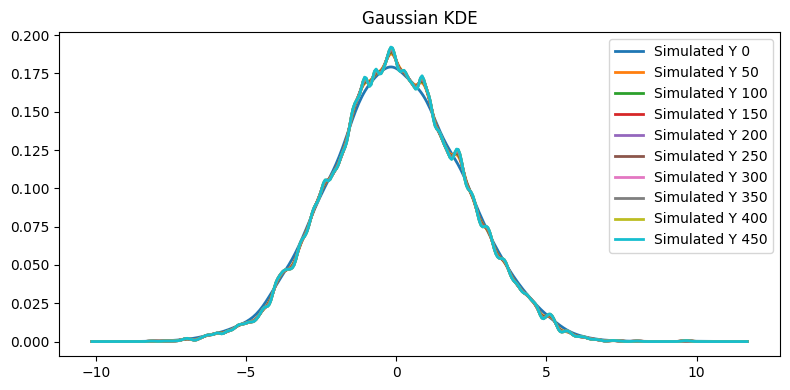

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import invgamma
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

X=np.random.randn(10000, 2) # [50, 2]
Y=X @ [1,2]+1.5*np.random.randn(10000) #[50, 1]

# init sigma2 dist
alpha_init=5
beta_init=5
dist=invgamma(a=alpha_init, scale=beta_init)
sigma2_init=dist.rvs(size=1)

# init beta dist
beta_mean_init=0.0*np.ones(2)
beta_sigma2_init=0.01*np.eye(2)

itercnt=500
simulation_results=[]
simulation_results.append([np.nan, sigma2_init])
simulation_y=[]
plt.figure(figsize=(10,6))
burn_in=0

def plot_hist_with_kde(samples, bins=40, bw_method="scott", label="KDE"):
    samples = np.asarray(samples).ravel()           # 1D로 평탄화
    kde = gaussian_kde(samples, bw_method=bw_method)

    # 평가 구간(grid)
    x_min, x_max = samples.min(), samples.max()
    pad = 0.1 * (x_max - x_min if x_max > x_min else 1.0)
    xs = np.linspace(x_min - pad, x_max + pad, 400)

    # 히스토그램 (밀도 정규화) + KDE 곡선
    #plt.hist(samples, bins=bins, density=True, alpha=0.4, edgecolor="black", label="Histogram (density)")
    plt.plot(xs, kde(xs), lw=2, label=label)

plt.figure(figsize=(8,4))
for i in range(itercnt):
    prev_beta, prev_sigma2 = simulation_results[-1]

    # sampling beta
    beta_dis_sigma2 = np.linalg.inv(X.T @ X / prev_sigma2 + np.linalg.inv(beta_sigma2_init))
    beta_dis_mean=beta_dis_sigma2 @ (X.T @ Y / prev_sigma2+np.linalg.inv(beta_sigma2_init) @ beta_mean_init)
    new_beta=np.random.multivariate_normal(beta_dis_mean, beta_dis_sigma2) # [2, 1]

    # sampling sigma2
    alpha_new=alpha_init + len(Y) / 2
    beta_new=beta_init + 0.5 * (Y-X @ new_beta).T @ (Y-X @ new_beta)
    new_sigma2=invgamma(a=alpha_new, scale=beta_new).rvs(size=1)

    simulation_results.append([new_beta, new_sigma2])
    simulation_y.append(X @ new_beta)
    if i % 50 == 0 and i>=burn_in:
        # plot linear regression plot
        plot_hist_with_kde(simulation_y[-1000:], bins=100, label=f'Simulated Y {i}')

plt.legend()
plt.title("Gaussian KDE")
plt.tight_layout()
plt.show()